# I. Importing Libraries

In [24]:
# Importing libraries
import pandas as pd
import numpy as np


# II. Dataset Download

In [25]:
# Load data source
mainFile = pd.ExcelFile('/home/giovane/estudo_pessoal/supply_opt/Supply_Optimization/Data/Supply chain logisitcs problem.xlsx')
# reading in all from excel sheets.

# using dictionary to access all dataframe variable easier.
df_dict = {}

for names in mainFile.sheet_names:  # returns a list of sheet names in the excel file.
    globals()[names] = mainFile.parse(names)
    df_dict[names] = globals()[names]
# show all keys
df_dict.keys()

dict_keys(['OrderList', 'FreightRates', 'WhCosts', 'WhCapacities', 'ProductsPerPlant', 'VmiCustomers', 'PlantPorts'])

In [26]:
df_dict['OrderList']

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000


# III. Data preparation and Transformation

In [27]:
# Print the shape of each dataframe
# Check and print - duplicates or missing values for each dataframe
for df_name, df in df_dict.items():
    print(df_name, '- shape:', df.shape)
    duplicate_count = df.duplicated().sum()
    missing_values_count = df.isnull().sum().sum()

    if duplicate_count > 0 or missing_values_count > 0:
        print(f">>>>{df_name} - duplicates: {duplicate_count}; missing values: {missing_values_count}")

OrderList - shape: (9215, 14)
FreightRates - shape: (1540, 11)
>>>>FreightRates - duplicates: 3; missing values: 0
WhCosts - shape: (19, 2)
WhCapacities - shape: (19, 2)
ProductsPerPlant - shape: (2036, 2)
VmiCustomers - shape: (14, 2)
PlantPorts - shape: (22, 2)


In [28]:
# drop duplicates
FreightRates = FreightRates.drop_duplicates()
# update dictionary
df_dict['FreightRates'] = FreightRates
# Rename columns by replacing spaces with underscores and '/', make them all uppercase.
for df_name, df in df_dict.items():
    df.columns = [col.strip().replace(' ', '_').replace('/', '_').upper() for col in df.columns]
# Update OrderList dataframe with cost calculation
orderList = df_dict['OrderList']  # Get the OrderList dataframe

# Merge OrderList with FreightRates and WhCosts on relevant columns
orderList = orderList.merge(df_dict['FreightRates'], left_on=['CARRIER', 'ORIGIN_PORT', 'DESTINATION_PORT'],
                            right_on=['CARRIER', 'ORIG_PORT_CD', 'DEST_PORT_CD'], how='left')
orderList = orderList.merge(df_dict['WhCosts'], left_on='PLANT_CODE', right_on='WH', how='left')

# Calculate the cost by multiplying unit quantity with the shipping rate and adding the storage cost
orderList['COST'] = (orderList['UNIT_QUANTITY'] * orderList['RATE']) + (orderList['UNIT_QUANTITY'] * orderList['COST_UNIT'])

# Perform detailed data preparation and transformation for OrderList dataframe
orderList = orderList.dropna()  # Drop rows with missing values
orderList['ORDER_DATE'] = pd.to_datetime(orderList['ORDER_DATE'])

# Perform additional data preparation and transformation for other dataframes
# Assuming you want to perform similar steps for ProductsPerPlant dataframe
productsPerPlant = df_dict['ProductsPerPlant']
productsPerPlant = productsPerPlant.dropna()  # Drop rows with missing values

# update dictionary values
df_dict['OrderList'] = orderList
df_dict['ProductsPerPlant'] = productsPerPlant

# Print the updated OrderList dataframe
orderList

,ORDER_ID,ORDER_DATE,ORIGIN_PORT,CARRIER,TPT,SERVICE_LEVEL,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,CUSTOMER,PRODUCT_ID,...,MAX_WGH_QTY,SVC_CD,MINIMUM_COST,RATE,MODE_DSC,TPT_DAY_CNT,CARRIER_TYPE,WH,COST_UNIT,COST
854,1.447385e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTP,31.2784,12.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,4713.804893
855,1.447385e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTD,31.2784,13.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5045.804893
856,1.447338e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTP,31.2784,12.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5082.958288
857,1.447338e+09,2013-05-26,PORT09,V444_0,0,DTP,0,0,V55555_4,1692724,...,5000.00,DTD,31.2784,13.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5440.958288
858,1.447407e+09,2013-05-26,PORT09,V444_0,0,DTP,3,0,V555555_6,1692722,...,5000.00,DTP,31.2784,12.2784,GROUND,0.0,V88888888_0,PLANT16,1.919808,5807.066871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209397,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,99.99,DTD,7.8044,0.0804,AIR,1.0,V888888883_1,PLANT03,0.517502,189.534900
209398,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,299.99,DTD,11.2272,0.0792,AIR,1.0,V888888883_1,PLANT03,0.517502,189.154500
209399,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,499.99,DTD,31.2672,0.0780,AIR,1.0,V888888883_1,PLANT03,0.517502,188.774100
209400,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,...,999.99,DTD,49.4272,0.0760,AIR,1.0,V888888883_1,PLANT03,0.517502,188.140100


In [29]:
# Check updated columns of all dataframes
for df_name, df in df_dict.items():
    print(f'Dataframe: {df_name} >>>')
    print('Columns:', df.columns.values)

Dataframe: OrderList >>>
Columns: ['ORDER_ID' 'ORDER_DATE' 'ORIGIN_PORT' 'CARRIER' 'TPT' 'SERVICE_LEVEL'
 'SHIP_AHEAD_DAY_COUNT' 'SHIP_LATE_DAY_COUNT' 'CUSTOMER' 'PRODUCT_ID'
 'PLANT_CODE' 'DESTINATION_PORT' 'UNIT_QUANTITY' 'WEIGHT' 'ORIG_PORT_CD'
 'DEST_PORT_CD' 'MINM_WGH_QTY' 'MAX_WGH_QTY' 'SVC_CD' 'MINIMUM_COST'
 'RATE' 'MODE_DSC' 'TPT_DAY_CNT' 'CARRIER_TYPE' 'WH' 'COST_UNIT' 'COST']
Dataframe: FreightRates >>>
Columns: ['CARRIER' 'ORIG_PORT_CD' 'DEST_PORT_CD' 'MINM_WGH_QTY' 'MAX_WGH_QTY'
 'SVC_CD' 'MINIMUM_COST' 'RATE' 'MODE_DSC' 'TPT_DAY_CNT' 'CARRIER_TYPE']
Dataframe: WhCosts >>>
Columns: ['WH' 'COST_UNIT']
Dataframe: WhCapacities >>>
Columns: ['PLANT_ID' 'DAILY_CAPACITY']
Dataframe: ProductsPerPlant >>>
Columns: ['PLANT_CODE' 'PRODUCT_ID']
Dataframe: VmiCustomers >>>
Columns: ['PLANT_CODE' 'CUSTOMERS']
Dataframe: PlantPorts >>>
Columns: ['PLANT_CODE' 'PORT']


# IV. Exploratory Data Analysis

In [30]:
df_dict['OrderList'].describe()

,ORDER_ID,ORDER_DATE,TPT,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,PRODUCT_ID,UNIT_QUANTITY,WEIGHT,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT,COST_UNIT,COST
count,2.085480e+05,208548,208548.000000,208548.000000,208548.000000,2.085480e+05,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000,208548.000000
mean,1.447273e+09,2013-05-26 00:00:00,1.624374,1.931987,0.037881,1.680153e+06,2664.160021,16.350336,420.013605,12770.395519,9.900351,0.132569,2.096975,0.527681,1597.678289
min,1.447126e+09,2013-05-26 00:00:00,0.000000,0.000000,0.000000,1.613321e+06,235.000000,0.000000,0.000000,0.500000,1.202000,0.042400,0.000000,0.465071,122.905694
25%,1.447195e+09,2013-05-26 00:00:00,1.000000,0.000000,0.000000,1.671942e+06,328.000000,1.404421,1.510000,99.990000,1.499200,0.048400,2.000000,0.517502,202.688741
50%,1.447273e+09,2013-05-26 00:00:00,2.000000,1.000000,0.000000,1.683634e+06,437.000000,4.484133,100.000000,299.990000,3.455200,0.056400,2.000000,0.517502,305.286643
75%,1.447345e+09,2013-05-26 00:00:00,2.000000,3.000000,0.000000,1.689547e+06,955.000000,13.080000,500.000000,1999.990000,3.455200,0.082400,3.000000,0.517502,634.937701
max,1.447425e+09,2013-05-26 00:00:00,3.000000,6.000000,6.000000,1.702224e+06,561847.000000,2338.405126,2000.000000,99999.990000,101.827200,13.278400,3.000000,1.919808,337053.078104
std,8.414006e+04,NaN,0.496295,2.059308,0.313074,1.450609e+04,14966.032979,49.284847,628.169544,32193.967016,21.315896,0.272103,0.701241,0.056108,8684.093299


In [31]:
df_dict['FreightRates'].describe()

,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,156.190905,4635.433438,12.300002,2.875135,2.188679
std,476.366708,20271.070359,22.959164,4.590475,2.002161
min,0.000000,0.453592,1.202000,0.033200,0.000000
25%,15.010000,21.500000,3.656800,0.451200,1.000000
50%,41.281408,47.500000,7.403200,1.656800,2.000000
75%,67.510000,75.000000,11.480000,3.916800,2.000000
max,10000.000000,99999.990000,425.027200,128.027200,14.000000


In [32]:
correlation_matrix = df_dict['OrderList'].corr(numeric_only=True).round(2)
correlation_matrix

,ORDER_ID,TPT,SHIP_AHEAD_DAY_COUNT,SHIP_LATE_DAY_COUNT,PRODUCT_ID,UNIT_QUANTITY,WEIGHT,MINM_WGH_QTY,MAX_WGH_QTY,MINIMUM_COST,RATE,TPT_DAY_CNT,COST_UNIT,COST
ORDER_ID,1.00,-0.02,-0.03,-0.03,0.03,0.01,0.00,-0.01,-0.01,0.01,0.01,-0.02,-0.01,0.01
TPT,-0.02,1.00,-0.13,0.06,-0.23,0.15,0.09,0.28,0.28,-0.40,-0.37,0.66,0.10,0.13
SHIP_AHEAD_DAY_COUNT,-0.03,-0.13,1.00,-0.02,0.08,-0.07,-0.01,-0.05,-0.05,0.07,0.06,-0.11,0.08,-0.07
SHIP_LATE_DAY_COUNT,-0.03,0.06,-0.02,1.00,-0.04,-0.01,-0.01,0.02,0.02,-0.03,-0.02,0.05,-0.02,-0.01
PRODUCT_ID,0.03,-0.23,0.08,-0.04,1.00,0.03,-0.04,-0.06,-0.06,0.09,0.09,-0.15,-0.09,0.03
UNIT_QUANTITY,0.01,0.15,-0.07,-0.01,0.03,1.00,0.43,0.03,0.03,-0.04,-0.03,0.06,-0.03,0.99
WEIGHT,0.00,0.09,-0.01,-0.01,-0.04,0.43,1.00,0.02,0.02,-0.02,0.02,0.04,0.05,0.43
MINM_WGH_QTY,-0.01,0.28,-0.05,0.02,-0.06,0.03,0.02,1.00,0.94,0.16,-0.19,0.20,-0.02,0.02
MAX_WGH_QTY,-0.01,0.28,-0.05,0.02,-0.06,0.03,0.02,0.94,1.00,-0.08,-0.12,0.21,-0.02,0.02
MINIMUM_COST,0.01,-0.40,0.07,-0.03,0.09,-0.04,-0.02,0.16,-0.08,1.00,-0.06,-0.30,0.03,-0.04


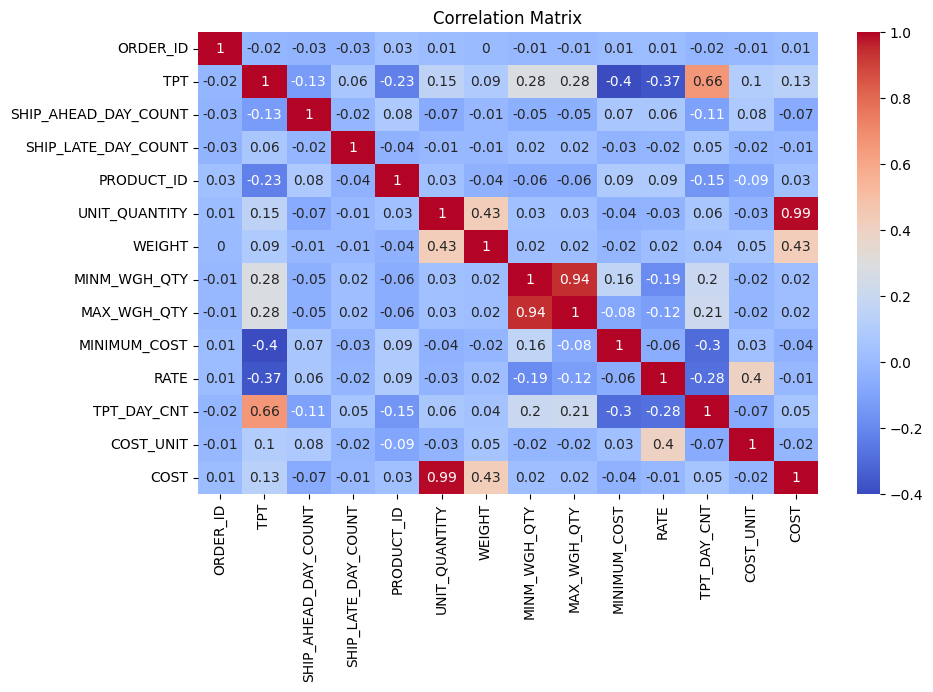

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Pricing and Revenue Data
pricing_strategy = df_dict['FreightRates']['MODE_DSC'].unique()
price_elasticity = df_dict['FreightRates']['RATE'].mean()
historical_revenue = df_dict['OrderList']['UNIT_QUANTITY'] * df_dict['OrderList']['COST']
total_revenue = historical_revenue.sum()
print("Pricing strategies:", pricing_strategy)
print("Average price elasticity:", price_elasticity)
print("Total historical revenue:", total_revenue)

Pricing strategies: ['AIR   ' 'GROUND']
Average price elasticity: 2.875135211279718
Total historical revenue: 27855522352652.188


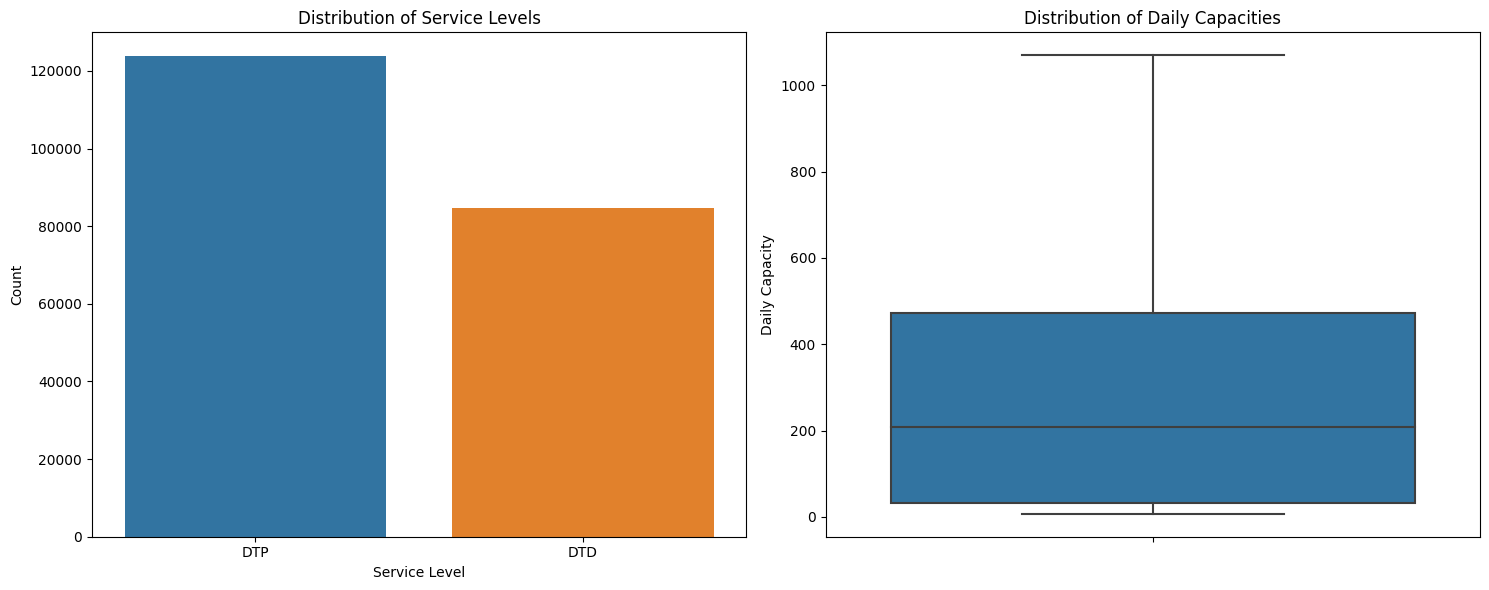

In [35]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of service levels (left subplot)
sns.countplot(data=df_dict['OrderList'], x='SERVICE_LEVEL', ax=axes[0])
axes[0].set_title('Distribution of Service Levels')
axes[0].set_xlabel('Service Level')
axes[0].set_ylabel('Count')

# Box plot of daily capacities (right subplot)
sns.boxplot(data=df_dict['WhCapacities'], y='DAILY_CAPACITY', ax=axes[1])
axes[1].set_title('Distribution of Daily Capacities')
axes[1].set_ylabel('Daily Capacity')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

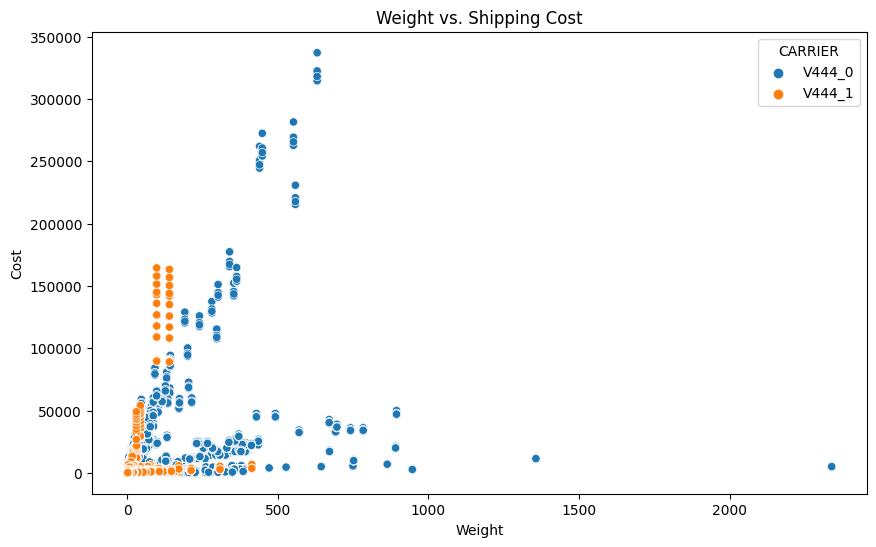

In [36]:
# Scatter plot of weight vs. shipping cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dict['OrderList'], x='WEIGHT', y='COST', hue='CARRIER')
plt.title('Weight vs. Shipping Cost')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

In [37]:
print(df_dict['ProductsPerPlant'].columns)


Index(['PLANT_CODE', 'PRODUCT_ID'], dtype='object')


In [38]:
plant_counts = pd.DataFrame(df_dict['ProductsPerPlant']['PLANT_CODE'].value_counts())
test = plant_counts.reset_index()
test

,PLANT_CODE,count
0,PLANT03,781
1,PLANT01,220
2,PLANT13,150
3,PLANT04,134
4,PLANT05,127
5,PLANT10,121
6,PLANT02,116
7,PLANT16,113
8,PLANT11,96
9,PLANT12,57


In [39]:
test['PLANT_CODE']

0     PLANT03
1     PLANT01
2     PLANT13
3     PLANT04
4     PLANT05
5     PLANT10
6     PLANT02
7     PLANT16
8     PLANT11
9     PLANT12
10    PLANT07
11    PLANT06
12    PLANT08
13    PLANT17
14    PLANT18
15    PLANT09
16    PLANT14
17    PLANT15
18       CND9
Name: PLANT_CODE, dtype: object

In [40]:
test.index

RangeIndex(start=0, stop=19, step=1)

Text(0.5, 1.0, 'Number of Products that each plant manufactures')

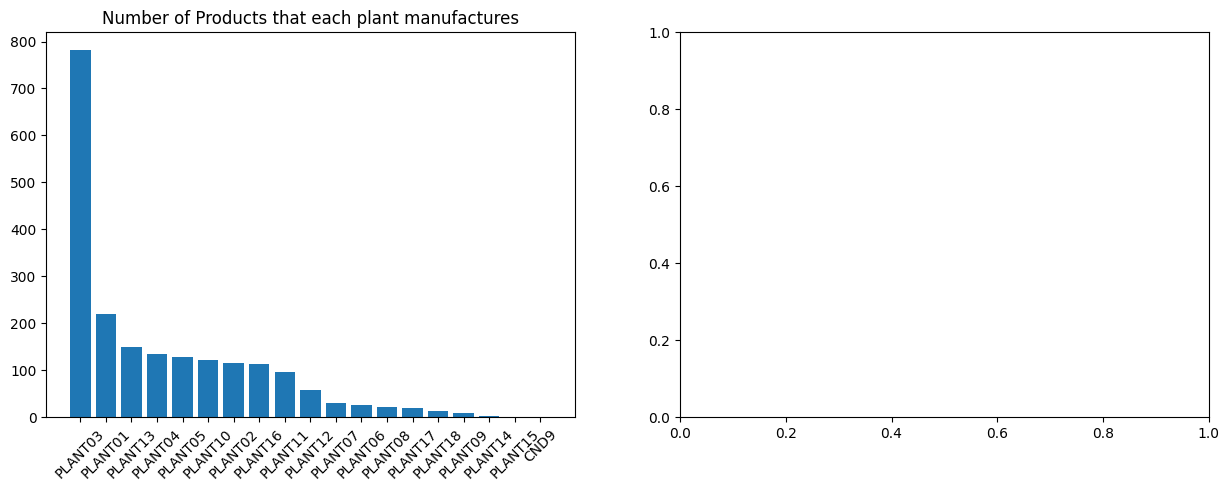

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Number of Products that each plant manufactures
plt.sca(axes[0])
plt.xticks(rotation=45)
plant_counts = pd.DataFrame(df_dict['ProductsPerPlant']['PLANT_CODE'].value_counts())
axes[0].bar(test['PLANT_CODE'], test['count'])
axes[0].set_title("Number of Products that each plant manufactures")

In [42]:
test = df_dict['ProductsPerPlant']['PLANT_CODE'].value_counts()
teste = test.reset_index()

In [43]:
teste['count']

0     781
1     220
2     150
3     134
4     127
5     121
6     116
7     113
8      96
9      57
10     29
11     26
12     21
13     20
14     12
15      8
16      3
17      1
18      1
Name: count, dtype: int64

In [45]:
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Plot Number of Products that each plant manufactures
# plt.sca(axes[0])
# plt.xticks(rotation=45)
# plant_counts = pd.DataFrame(df_dict['ProductsPerPlant']['PLANT_CODE'].value_counts())
# plant = plant_counts.reset_index()
# axes[0].bar(test['PLANT_CODE'], test['count'])
# axes[0].set_title("Number of Products that each plant manufactures")

# # Plot Manufacturing Cost for each Plant
# plt.sca(axes[1])
# plt.xticks(rotation=45)
# axes[1].bar(df_dict['WhCosts']['WH'], df_dict['WhCosts']["COST_UNIT"])
# axes[1].set_title("Manufacturing Cost for each Plant")

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

In [46]:
import plotly.graph_objects as go

# Load the PlantPorts dataframe
# Selecionou a aba plantport do dataset que diz quais são as conexões entre
# as plantas e portos
df_plant_ports = df_dict['PlantPorts']

# Create the figure
fig = go.Figure()

# Add the connections as traces
# para cada linha, foi feito dois X, onde o primeiro ele vale 1 e o segundo vale 0
# esses pontos são conectados por uma linha (mode) e os marcadores são círculos
for _, row in df_plant_ports.iterrows():
    fig.add_trace(
        go.Scatter(
            x = [row['PLANT_CODE'], row['PORT']],
            y = [1, 0],
            mode = 'lines+markers',
            marker = dict(
                size = 10,
                symbol = 'circle',
                line = dict(
                    color = 'blue',
                    width = 2
                )
            ),
            hoverinfo = 'text',
            text = f"Plant: {row['PLANT_CODE']}<br>Port: {row['PORT']}",
        )
    )

# Set up the layout
fig.update_layout(
    title_text = 'Plant and Port Connections',
    showlegend = False,
    xaxis = dict(
        title = 'PLANT_CODE - PORT',
        tickangle = -45
    ),
    yaxis = dict(
        title = '',
        showticklabels = False,
        range = [-0.2, 1.2]
    )
)

# Show the interactive plot
fig.show()

# V. Modeling

In [47]:
# Creates a list of all the supply nodes
# Supply nodes é um local físico na logística (plantas, warehouses etc)
supply_nodes = list(df_dict['WhCosts']['WH'])
supply_nodes

['PLANT15',
 'PLANT17',
 'PLANT18',
 'PLANT05',
 'PLANT02',
 'PLANT01',
 'PLANT06',
 'PLANT10',
 'PLANT07',
 'PLANT14',
 'PLANT16',
 'PLANT12',
 'PLANT11',
 'PLANT09',
 'PLANT03',
 'PLANT13',
 'PLANT19',
 'PLANT08',
 'PLANT04']

In [51]:
# Creates a dictionary for the number of units of supply for each supply node
# Soma as capacidades dentro da aba WhCapacities onde o PLANT ID é igual ao node dentro de supply node
# Basicamente cria um dicionário com a aba WhCapacities
supply_dict = {}
for node in supply_nodes:
    total_capacity = sum(df_dict['WhCapacities']['DAILY_CAPACITY'][df_dict['WhCapacities']['PLANT_ID'] == node])
    supply_dict[node] = total_capacity

supply_dict

{'PLANT15': 11,
 'PLANT17': 8,
 'PLANT18': 111,
 'PLANT05': 385,
 'PLANT02': 138,
 'PLANT01': 1070,
 'PLANT06': 49,
 'PLANT10': 118,
 'PLANT07': 265,
 'PLANT14': 549,
 'PLANT16': 457,
 'PLANT12': 209,
 'PLANT11': 332,
 'PLANT09': 11,
 'PLANT03': 1013,
 'PLANT13': 490,
 'PLANT19': 7,
 'PLANT08': 14,
 'PLANT04': 554}

In [69]:
# tentativa de alternativa
df_plant_capacities = df_dict['WhCapacities']
df_plant_capacities

log_dict = {}
for plant in df_plant_capacities.iterrows():
   log_dict[plant[1]['PLANT_ID']] = plant[1]['DAILY_CAPACITY']

log_dict

{'PLANT15': 11,
 'PLANT17': 8,
 'PLANT18': 111,
 'PLANT05': 385,
 'PLANT02': 138,
 'PLANT01': 1070,
 'PLANT06': 49,
 'PLANT10': 118,
 'PLANT07': 265,
 'PLANT14': 549,
 'PLANT16': 457,
 'PLANT12': 209,
 'PLANT11': 332,
 'PLANT09': 11,
 'PLANT03': 1013,
 'PLANT13': 490,
 'PLANT19': 7,
 'PLANT08': 14,
 'PLANT04': 554}

In [71]:
# Creates a list of all demand nodes
#Baseado na tabela de ordens, identifica quais são os portos destinos
demand_nodes = list(df_dict['OrderList']['DESTINATION_PORT'].unique())
demand_nodes

['PORT09']

In [72]:
#para cada porto destino, identificar e somar o número de demandas
demand_dict = {}
for index, row in df_dict['OrderList'].iterrows():
    dest_port = row['DESTINATION_PORT']
    unit_quantity = row['UNIT_QUANTITY']
    if dest_port in demand_dict:
        demand_dict[dest_port] += unit_quantity
    else:
        demand_dict[dest_port] = unit_quantity

In [73]:
#quantidade total de unidades demandadas pelos portos.
demand_dict

{'PORT09': 555605244}

In [ ]:
# Creates a dictionary for the number of units of supply for each supply node
supply_dict = {}
for node in supply_nodes:
    total_capacity = sum(df_dict['WhCapacities']['DAILY_CAPACITY'][df_dict['WhCapacities']['PLANT_ID'] == node])
    supply_dict[node] = total_capacity

# Creates a list of all demand nodes
demand_nodes = list(df_dict['OrderList']['DESTINATION_PORT'].unique())

# Creates a dictionary for the number of units of demand for each demand node
demand_dict = {}
for index, row in df_dict['OrderList'].iterrows():
    dest_port = row['DESTINATION_PORT']
    unit_quantity = row['UNIT_QUANTITY']
    if dest_port in demand_dict:
        demand_dict[dest_port] += unit_quantity
    else:
        demand_dict[dest_port] = unit_quantity

#### Até agora temos as seguintes informações:
#### Suply_dict: é um dicionário com a capacidade de produção de cada planta (em unidades)
#### Demand nodes: é um dicionario com todos os portos que tiveram demanda
#### Demand dict: é um dicionário com a quantidade total de unidades demandadas por cada porto.

In [74]:
# Creates a list of costs of each transportation path
costs = []
for index, row in df_dict['OrderList'].iterrows():
    carrier = row['CARRIER']
    orig_port = row['ORIG_PORT_CD']
    dest_port = row['DEST_PORT_CD']
    weight = row['WEIGHT']

    matching_rates = df_dict['FreightRates'][(df_dict['FreightRates']['CARRIER'] == carrier) &
                                  (df_dict['FreightRates']['ORIG_PORT_CD'] == orig_port) &
                                  (df_dict['FreightRates']['DEST_PORT_CD'] == dest_port) &
                                  (df_dict['FreightRates']['MINM_WGH_QTY'] <= weight) &
                                  (df_dict['FreightRates']['MAX_WGH_QTY'] >= weight)]['RATE']
    # Dentro da aba FreightRates, selecionar "rate" para cada transporte que corresponder ao porto de origem
    # ao porto de destino e o peso estiver dentro do peso estipulado

    rate = matching_rates.values[0] if not matching_rates.empty else None
    costs.append(rate)
    costs

In [78]:
matching_rates.values[0]

0.3804

In [75]:
#a tabela abaixo tem o preço de frete de cada transporte para cada pedido feito
costs

[12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 12.2784,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.0824,
 0.08

In [79]:
# Create a dictionary with supply nodes as keys, demand nodes as sub-keys, and costs as values
cost_dict = {}
for supply_node in supply_nodes:
    cost_dict[supply_node] = {}
    for demand_node in demand_nodes:
        cost_dict[supply_node][demand_node] = costs.pop(0)


In [80]:
# Dicionário com a planta de origem, a planta de destino e o custo de frete
cost_dict

{'PLANT15': {'PORT09': 12.2784},
 'PLANT17': {'PORT09': 12.2784},
 'PLANT18': {'PORT09': 12.2784},
 'PLANT05': {'PORT09': 12.2784},
 'PLANT02': {'PORT09': 12.2784},
 'PLANT01': {'PORT09': 12.2784},
 'PLANT06': {'PORT09': 12.2784},
 'PLANT10': {'PORT09': 12.2784},
 'PLANT07': {'PORT09': 12.2784},
 'PLANT14': {'PORT09': 12.2784},
 'PLANT16': {'PORT09': 12.2784},
 'PLANT12': {'PORT09': 12.2784},
 'PLANT11': {'PORT09': 12.2784},
 'PLANT09': {'PORT09': 12.2784},
 'PLANT03': {'PORT09': 12.2784},
 'PLANT13': {'PORT09': 12.2784},
 'PLANT19': {'PORT09': 12.2784},
 'PLANT08': {'PORT09': 12.2784},
 'PLANT04': {'PORT09': 12.2784}}

In [81]:
# Import PuLP modeler functions
from pulp import *

# Creates the 'prob' variable to contain the problem data
# definição do modelo
prob = LpProblem("MaterialSupplyProblem", LpMinimize)

In [82]:
# Creates a list of tuples containing all the possible routes for transport
#lista com a tupla de porto de origem e porto destino
Routes = [(w, b) for w in supply_nodes for b in demand_nodes]

In [83]:
Routes

[('PLANT15', 'PORT09'),
 ('PLANT17', 'PORT09'),
 ('PLANT18', 'PORT09'),
 ('PLANT05', 'PORT09'),
 ('PLANT02', 'PORT09'),
 ('PLANT01', 'PORT09'),
 ('PLANT06', 'PORT09'),
 ('PLANT10', 'PORT09'),
 ('PLANT07', 'PORT09'),
 ('PLANT14', 'PORT09'),
 ('PLANT16', 'PORT09'),
 ('PLANT12', 'PORT09'),
 ('PLANT11', 'PORT09'),
 ('PLANT09', 'PORT09'),
 ('PLANT03', 'PORT09'),
 ('PLANT13', 'PORT09'),
 ('PLANT19', 'PORT09'),
 ('PLANT08', 'PORT09'),
 ('PLANT04', 'PORT09')]

In [84]:

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
# Variáveis do problema onde "route" é o nome (prefixo), a tupla são os índices, 0 é o limte inferior
# uma vez que a rota tem que acontecer (não pode ser negativa), None é o superior e LpInteger diz que deve ser inteiro
vars = LpVariable.dicts("Route", (supply_nodes, demand_nodes), 0, None, LpInteger)
vars

{'PLANT15': {'PORT09': Route_PLANT15_PORT09},
 'PLANT17': {'PORT09': Route_PLANT17_PORT09},
 'PLANT18': {'PORT09': Route_PLANT18_PORT09},
 'PLANT05': {'PORT09': Route_PLANT05_PORT09},
 'PLANT02': {'PORT09': Route_PLANT02_PORT09},
 'PLANT01': {'PORT09': Route_PLANT01_PORT09},
 'PLANT06': {'PORT09': Route_PLANT06_PORT09},
 'PLANT10': {'PORT09': Route_PLANT10_PORT09},
 'PLANT07': {'PORT09': Route_PLANT07_PORT09},
 'PLANT14': {'PORT09': Route_PLANT14_PORT09},
 'PLANT16': {'PORT09': Route_PLANT16_PORT09},
 'PLANT12': {'PORT09': Route_PLANT12_PORT09},
 'PLANT11': {'PORT09': Route_PLANT11_PORT09},
 'PLANT09': {'PORT09': Route_PLANT09_PORT09},
 'PLANT03': {'PORT09': Route_PLANT03_PORT09},
 'PLANT13': {'PORT09': Route_PLANT13_PORT09},
 'PLANT19': {'PORT09': Route_PLANT19_PORT09},
 'PLANT08': {'PORT09': Route_PLANT08_PORT09},
 'PLANT04': {'PORT09': Route_PLANT04_PORT09}}

In [92]:
vars['PLANT15']

{'PORT09': Route_PLANT15_PORT09}

In [89]:
cost_dict['PLANT15']

{'PORT09': 12.2784}

In [90]:
# The minimum objective function is added to 'prob' first
# prob é o modelo, LpSum é a soma linear de uma lista de expressões
prob += lpSum([vars[w][b] * cost_dict[w][b] for (w, b) in Routes]), "Sum_of_Transporting_Costs"

In [91]:
prob

MaterialSupplyProblem:
MINIMIZE
12.2784*Route_PLANT01_PORT09 + 12.2784*Route_PLANT02_PORT09 + 12.2784*Route_PLANT03_PORT09 + 12.2784*Route_PLANT04_PORT09 + 12.2784*Route_PLANT05_PORT09 + 12.2784*Route_PLANT06_PORT09 + 12.2784*Route_PLANT07_PORT09 + 12.2784*Route_PLANT08_PORT09 + 12.2784*Route_PLANT09_PORT09 + 12.2784*Route_PLANT10_PORT09 + 12.2784*Route_PLANT11_PORT09 + 12.2784*Route_PLANT12_PORT09 + 12.2784*Route_PLANT13_PORT09 + 12.2784*Route_PLANT14_PORT09 + 12.2784*Route_PLANT15_PORT09 + 12.2784*Route_PLANT16_PORT09 + 12.2784*Route_PLANT17_PORT09 + 12.2784*Route_PLANT18_PORT09 + 12.2784*Route_PLANT19_PORT09 + 0.0
VARIABLES
0 <= Route_PLANT01_PORT09 Integer
0 <= Route_PLANT02_PORT09 Integer
0 <= Route_PLANT03_PORT09 Integer
0 <= Route_PLANT04_PORT09 Integer
0 <= Route_PLANT05_PORT09 Integer
0 <= Route_PLANT06_PORT09 Integer
0 <= Route_PLANT07_PORT09 Integer
0 <= Route_PLANT08_PORT09 Integer
0 <= Route_PLANT09_PORT09 Integer
0 <= Route_PLANT10_PORT09 Integer
0 <= Route_PLANT11_PORT09

In [ ]:
# # Import PuLP modeler functions
# from pulp import *

# # Creates the 'prob' variable to contain the problem data
# # definição do modelo
# prob = LpProblem("MaterialSupplyProblem", LpMinimize)

# # Creates a list of tuples containing all the possible routes for transport
# Routes = [(w, b) for w in supply_nodes for b in demand_nodes]

# # A dictionary called 'Vars' is created to contain the referenced variables(the routes)
# vars = LpVariable.dicts("Route", (supply_nodes, demand_nodes), 0, None, LpInteger)

# # The minimum objective function is added to 'prob' first
# prob += lpSum([vars[w][b] * cost_dict[w][b] for (w, b) in Routes]), "Sum_of_Transporting_Costs"

In [93]:
# The supply maximum constraints are added to prob for each supply node (warehouses)
# A unidade de produtos demandados deve ser inferior ou igual a quantidade de produtos
# produzidos em cada fábrica
for w in supply_nodes:
    prob += (
        lpSum([vars[w][b] for b in demand_nodes]) <= supply_dict[w],
        "Sum_of_Products_out_of_warehouses_%s" % w,
    )


# The demand minimum constraints are added to prob for each demand node (project)
# o número de produtos fornecidos deve ser maior ou igual ao demandado
for b in demand_nodes:
    prob += (
        lpSum([vars[w][b] for w in supply_nodes]) >= demand_dict[b],
        "Sum_of_Products_into_projects%s" % b,
    )

# Add constraint to avoid routes from a node to itself
# não pode haver distribuição para o mesmo local. Caso seja, a variável deve ser 0
for w in supply_nodes:
    for b in demand_nodes:
        if w != b:  # Check if supply node is different from demand node
            prob += (vars[w][b] >= 0, "No_Self_Transportation_%s_%s" % (w, b))
        else:
            prob += (vars[w][b] == 0, "No_Self_Transportation_%s_%s" % (w, b))
            vars[w][b].lowBound = 0  # Set lower bound to 0 for self-transportation

In [94]:
prob

MaterialSupplyProblem:
MINIMIZE
12.2784*Route_PLANT01_PORT09 + 12.2784*Route_PLANT02_PORT09 + 12.2784*Route_PLANT03_PORT09 + 12.2784*Route_PLANT04_PORT09 + 12.2784*Route_PLANT05_PORT09 + 12.2784*Route_PLANT06_PORT09 + 12.2784*Route_PLANT07_PORT09 + 12.2784*Route_PLANT08_PORT09 + 12.2784*Route_PLANT09_PORT09 + 12.2784*Route_PLANT10_PORT09 + 12.2784*Route_PLANT11_PORT09 + 12.2784*Route_PLANT12_PORT09 + 12.2784*Route_PLANT13_PORT09 + 12.2784*Route_PLANT14_PORT09 + 12.2784*Route_PLANT15_PORT09 + 12.2784*Route_PLANT16_PORT09 + 12.2784*Route_PLANT17_PORT09 + 12.2784*Route_PLANT18_PORT09 + 12.2784*Route_PLANT19_PORT09 + 0.0
SUBJECT TO
Sum_of_Products_out_of_warehouses_PLANT15: Route_PLANT15_PORT09 <= 11

Sum_of_Products_out_of_warehouses_PLANT17: Route_PLANT17_PORT09 <= 8

Sum_of_Products_out_of_warehouses_PLANT18: Route_PLANT18_PORT09 <= 111

Sum_of_Products_out_of_warehouses_PLANT05: Route_PLANT05_PORT09 <= 385

Sum_of_Products_out_of_warehouses_PLANT02: Route_PLANT02_PORT09 <= 138

Sum_of_

In [ ]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

# Print the variables optimized value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen
print("Value of Objective Function = ", value(prob.objective))
#Qual o número de unidades mínimo para cada porto?

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/a68c8dfe143f4e108269d4d58ce454ad-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/a68c8dfe143f4e108269d4d58ce454ad-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 44 COLUMNS
At line 159 RHS
At line 199 BOUNDS
At line 219 ENDATA
Problem MODEL has 39 rows, 19 columns and 57 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Route_PLANT01_PORT09 = 1070.0
Route_PLANT02_PORT09 = 138.0
Route_PLANT03_PORT09 = 555600470.0
Route_PLANT04_PORT09 = 554.0
Route_PLANT05_PORT09 = 385.0
Route_PLANT06_PORT09 = 49.0
Route_PLANT07_PORT09 = 265.0
Route_PLANT08_PO